# Title

# Import Library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Import Data

In [2]:
ad_data = pd.read_csv('./Dataset/Sales dataset/advertising.csv')

In [3]:
ad_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Describe Data

In [4]:
ad_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
ad_data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
ad_data.shape

(200, 4)

In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Visualization

Text(0.5, 1.0, 'Sales vs TV')

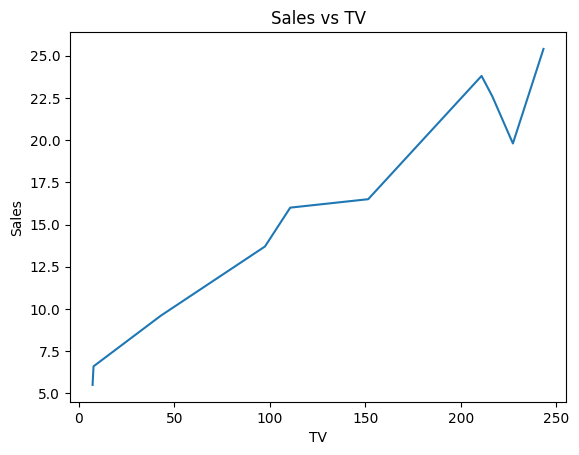

In [9]:
sns.lineplot(data=ad_data.sample(10),x='TV',y='Sales').set_title('Sales vs TV')

Text(0.5, 1.0, 'Sales vs Radio')

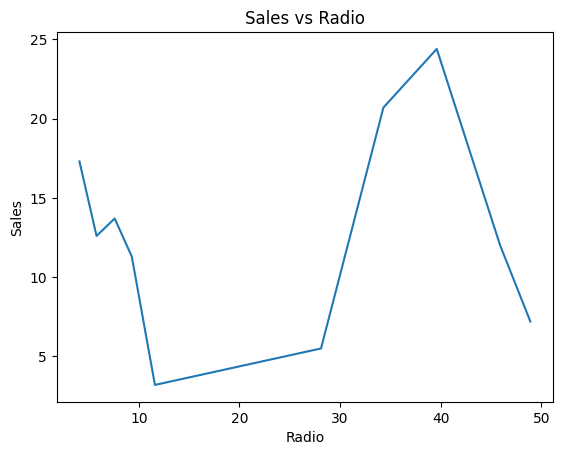

In [10]:
sns.lineplot(data=ad_data.sample(10),x='Radio',y='Sales').set_title('Sales vs Radio')

Text(0.5, 1.0, 'Sales vs Newspaper')

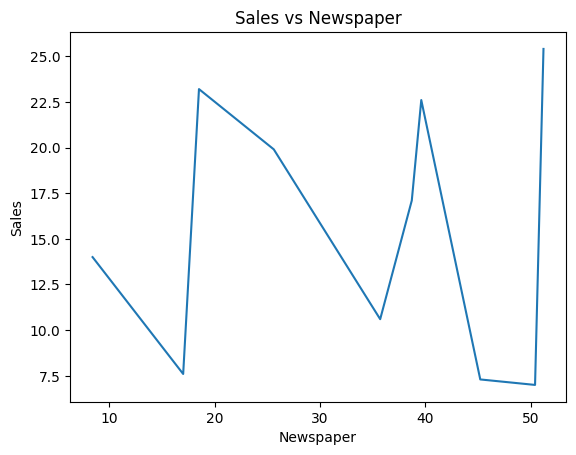

In [11]:
sns.lineplot(data=ad_data.sample(10),x='Newspaper',y='Sales').set_title('Sales vs Newspaper')

C:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


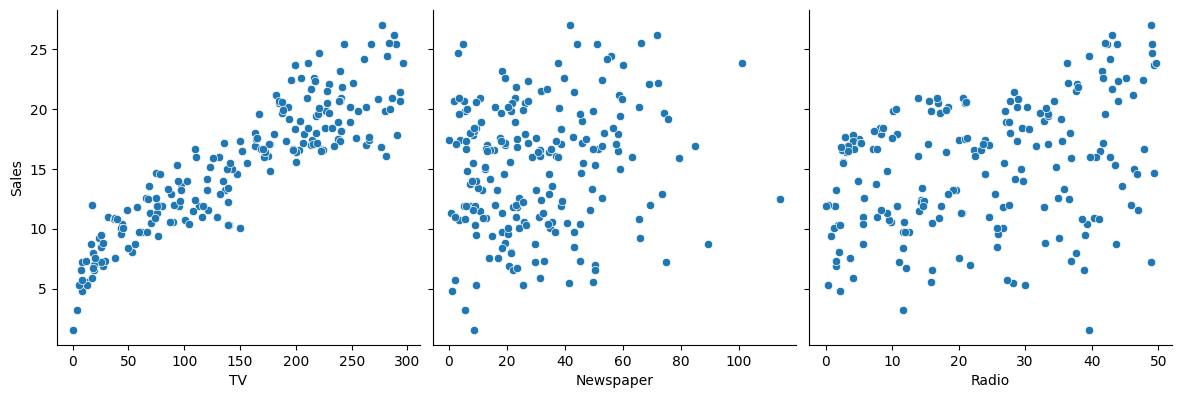

In [12]:
sns.pairplot(ad_data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')

<Axes: xlabel='Sales'>

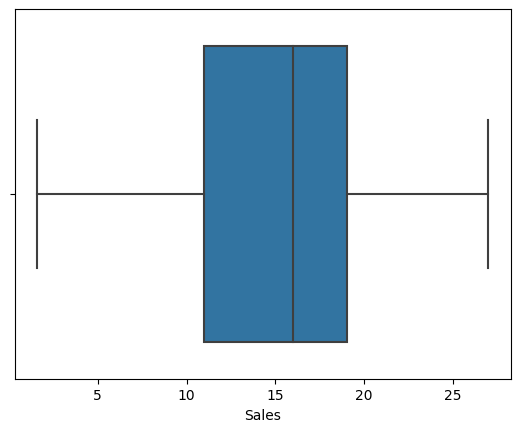

In [13]:
sns.boxplot(x=ad_data['Sales'])

# Data Preprocessing

In [14]:
ad_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Define Target Variable (y) and Feature Variables (X)

In [15]:
#Simple Linear Regression
x = ad_data[['TV']]
y = ad_data['Sales']

# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 2529)

In [17]:
x_train.head()

,TV
134,36.9
31,112.9
95,163.3
145,140.3
74,213.4


In [18]:
y_train.head()

134    10.8
31     11.9
95     16.9
145    10.3
74     17.0
Name: Sales, dtype: float64

# Model Building

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [21]:
model.intercept_

6.9747220859234735

In [22]:
model.coef_

array([0.05559865])

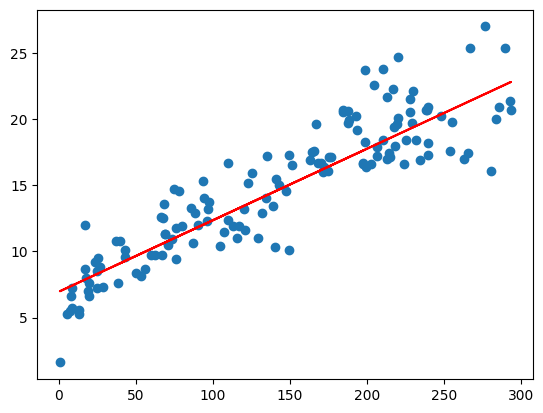

In [23]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

# Prediction

In [24]:
y_pred = model.predict(x_test)
y_pred

array([20.41291598, 16.06510149,  7.93101888,  8.01441686, 14.73073387,
       22.19207281, 11.15018076, 11.96192106, 15.6814708 , 13.67435951,
       13.12949273,  7.6252263 , 17.59962425, 20.92442357, 23.13724987,
       22.35886876, 18.32240671, 12.68470352, 14.64177603, 19.00627012,
        9.66013692, 17.12703572, 11.17242022, 14.2637052 ,  9.44886205,
       21.58048765,  7.45287048, 12.55682663, 17.02695815, 19.60673555,
       22.96489405, 16.81568328, 10.17164451, 20.17384178,  9.08747082,
       11.16130049,  7.20267655, 14.71405428, 20.17384178,  8.72607959,
       14.54725832, 18.08333251, 19.12302728, 21.71948428, 12.29551297,
        9.45998178, 21.50264954, 20.8076664 , 22.55346404, 20.31283841,
       19.33986202, 23.45416218,  8.50368498, 22.62018242, 19.33986202,
       17.83869845, 11.21689914, 18.62819929, 20.49631396, 22.74249945])

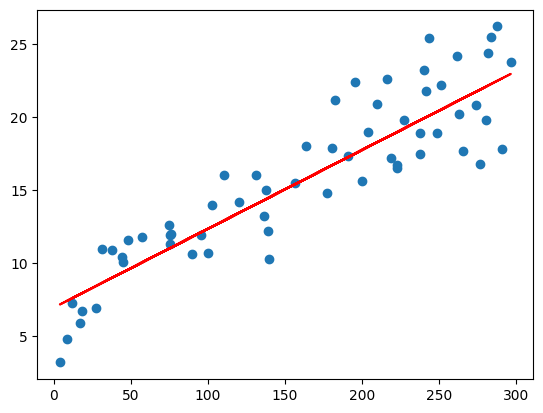

In [25]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()

# Model Testing

In [26]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [27]:
mean_absolute_percentage_error(y_test,y_pred)

0.1529668478884894

In [28]:
mean_absolute_error(y_test,y_pred)

2.018579040442432

In [29]:
mean_squared_error(y_test,y_pred)

5.852606589121219